In [1]:
import pandas as pd
import numpy as np
import pickle, json
import random
import time
import os


import tensorflow as tf
from tensorflow import keras

from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.datasets
from sklearn import preprocessing



from tqdm.notebook import tqdm

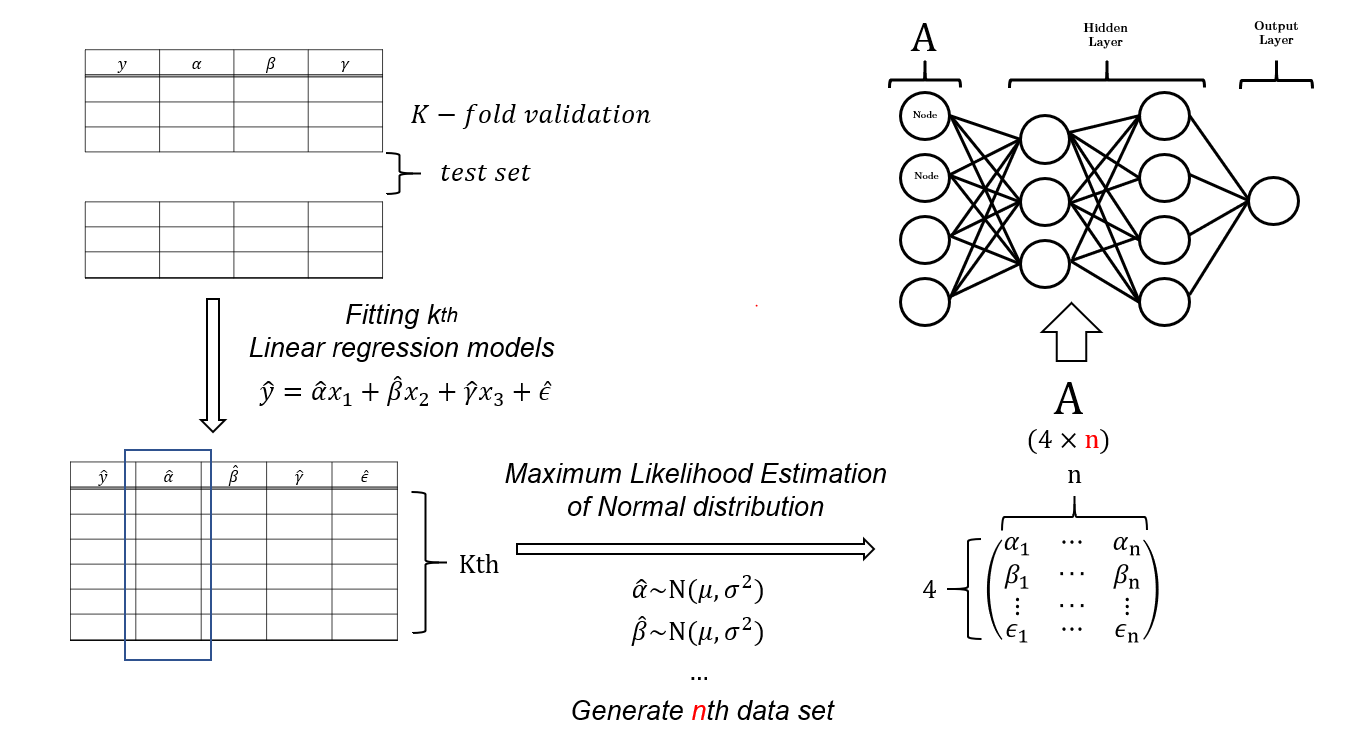

In [2]:
def extraction_dataset(data_2,number):
    test_model = data_2[data_2["Model"]==number]
    a = list(test_model["LayerNum"].value_counts().sort_index().keys())
    a_index = [i-1 for i in a]
    df_ = test_model.iloc[a_index,:]
    return df_

In [3]:
data = pd.read_excel(r"C:\Users\Samsung\jupyter\Project_PCB\data\Data_preprocessing5.xlsx")
data = data.fillna(0)
data.head()

,Model,LayerNum,PP,MatlMaker,RD,GD,MatlNum,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness
0,1,1,1,DS7402M,1.36,2.56,1080.0,61.0,46.8,8.21,55,14.29,73,60,67.70
1,1,2,0,DS7402M,1.36,2.56,0.0,0.0,0.0,14.29,73,15.04,56,75,73.71
2,1,3,1,DS7402M,1.36,2.56,7628.0,47.0,203.4,15.04,56,14.58,46,200,187.25
3,1,4,0,DS7402M,1.36,2.56,0.0,0.0,0.0,14.58,46,14.29,75,75,77.47
4,1,5,1,DS7402M,1.36,2.56,3313.0,53.0,81.4,14.29,75,15.04,48,90,80.48


In [4]:
data["MatlMaker"].value_counts()

DS7402M     1809
DS7402LC     635
EM-370Z      218
IT150G       126
EM-526       117
NPG-151      110
Name: MatlMaker, dtype: int64

In [5]:
dic_glass = {}
keys = data["MatlG"].groupby(data["MatlNum"]).mean().keys()
values = data["MatlG"].groupby(data["MatlNum"]).mean().values
for i in range(len(keys)):
    dic_glass[keys[i]] = round(values[i],2)
data = data.drop(columns=["RD","GD","MatlNum"])
data.head()


,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness
0,1,1,1,DS7402M,61.0,46.8,8.21,55,14.29,73,60,67.70
1,1,2,0,DS7402M,0.0,0.0,14.29,73,15.04,56,75,73.71
2,1,3,1,DS7402M,47.0,203.4,15.04,56,14.58,46,200,187.25
3,1,4,0,DS7402M,0.0,0.0,14.58,46,14.29,75,75,77.47
4,1,5,1,DS7402M,53.0,81.4,14.29,75,15.04,48,90,80.48


In [6]:
model_list = list(data["Model"].value_counts().keys())
testset_dic = {}
testset_list = []
for mo in model_list:
    globals () ["model_{}".format(mo)] = extraction_dataset(data,mo)
    testset_list.append(globals () ["model_{}".format(mo)])
    testset_dic["model_{}".format(mo)] = globals () ["model_{}".format(mo)]
drop_index = []
for i in testset_list:
    drop_index.extend(list(i.index))
data_drop = data.drop(drop_index)

In [7]:
data_drop.head()

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness
11,1,1,1,DS7402M,61.0,46.8,8.37,55,14.29,73,60,66.19
12,1,2,0,DS7402M,0.0,0.0,14.29,73,15.04,56,75,74.47
13,1,3,1,DS7402M,47.0,203.4,15.04,56,15.04,46,200,196.32
14,1,4,0,DS7402M,0.0,0.0,15.04,46,15.04,75,75,75.22
15,1,5,1,DS7402M,53.0,81.4,15.04,75,15.04,48,90,82.26


In [8]:
testset_list[0].head()

,Model,LayerNum,PP,MatlMaker,RC,MatlG,Cu1,CP1,Cu2,CP2,Input_T,Thickness
235,5,1,1,EM-370Z,63.0,46.8,8.14,50,14.91,70,60,68.590
236,5,2,0,EM-370Z,58.0,48.0,14.91,70,14.91,51,64,60.390
237,5,3,1,EM-370Z,57.0,103.8,14.91,51,0.00,0,100,119.285
238,5,4,1,EM-370Z,57.0,103.8,0.00,0,15.66,40,100,119.285
239,5,5,0,EM-370Z,58.0,48.0,15.66,40,14.17,72,64,59.640


In [9]:
data_drop = data_drop[data_drop["PP"]==1]
Maker = data_drop['MatlMaker'].unique()
Glass_all = data_drop['MatlG'].unique()
len_list = {}

for i in Maker:
    df = data_drop[data_drop['MatlMaker'] == i]
    Glass = df['MatlG'].unique()
    for j in Glass:
        df2 = df[df['MatlG'] == j]
        len_list["{} {}".format(i,j)] = len(df2)
list(len_list.keys())[list(len_list.values()).index(max(len_list.values()))]

'DS7402M 46.8'

# 'DS7402M 46.8' 로 test 하기

In [10]:
data_test = data_drop[data_drop["MatlMaker"]=="DS7402M"]
data_test = data_drop[data_drop["MatlG"]==46.8]

drop_list = ['MatlMaker','MatlG',"Model","PP"]
data_test = data_test.drop(columns=drop_list)
data_test.head()

,LayerNum,RC,Cu1,CP1,Cu2,CP2,Input_T,Thickness
11,1,61.0,8.37,55,14.29,73,60,66.19
21,11,61.0,14.29,73,8.53,56,60,65.44
22,1,61.0,8.69,55,14.29,73,60,67.70
32,11,61.0,14.29,73,8.05,56,60,66.02
33,1,61.0,8.37,55,13.54,73,60,67.70


In [11]:
data_x = data_test.values #returns a numpy array
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(data_x)
data_2 = pd.DataFrame(x_scaled,columns=list(data_test.columns))
data_2.head()

,LayerNum,RC,Cu1,CP1,Cu2,CP2,Input_T,Thickness
0,0.007013,0.427806,0.058701,0.385726,0.100219,0.511964,0.420792,0.464204
1,0.076890,0.426392,0.099888,0.510273,0.059625,0.391442,0.419402,0.457428
2,0.006978,0.425638,0.060636,0.383772,0.099711,0.509370,0.418660,0.472388
3,0.076762,0.425683,0.099721,0.509424,0.056176,0.390791,0.418705,0.460715
4,0.006982,0.425911,0.058441,0.384018,0.094538,0.509697,0.418929,0.472691


In [12]:
y = data_2.loc[:,"Thickness"]
x = data_2.drop(columns="Thickness")
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 1. Linear regression

In [13]:
def rsq(y_pred,y_test):
    se = y_test - y_pred
    se2 = se ** 2
    s = sum(i for i in se2)

    st = y_test - np.mean(y_test)
    st2 = st ** 2
    t = sum(i for i in st2)

    r_sqr = 1 - (s/t)
    return r_sqr

In [14]:
tq =  tqdm(range(100))
n = 0
lr_result = []
for i in tq:
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=n)
    lr = linear_model.LinearRegression()
    lr.fit(X_train, y_train)
    lr_result.append(list(lr.coef_)+[lr.intercept_])
    n += 1
lr_df = pd.DataFrame(lr_result,columns=x.columns.to_list() + ["intercept"])
lr_statis = lr_df.describe()

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
lr_df.head()

,LayerNum,RC,Cu1,CP1,Cu2,CP2,Input_T,intercept
0,-0.161502,-0.254137,-0.368421,-0.439484,-0.364151,-0.446525,-1.893878,1.836063
1,-0.179689,-0.199105,-0.373919,-0.428779,-0.359160,-0.444362,-1.895661,1.807992
2,-0.167993,-0.231709,-0.369785,-0.431893,-0.355922,-0.443847,-1.910638,1.828532
3,-0.165200,-0.246561,-0.357979,-0.436564,-0.367360,-0.445387,-1.898088,1.832186
4,-0.159046,-0.269292,-0.359559,-0.444071,-0.366393,-0.453757,-1.882219,1.842250


In [16]:
lr_statis

,LayerNum,RC,Cu1,CP1,Cu2,CP2,Input_T,intercept
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.163418,-0.256982,-0.366228,-0.440219,-0.362312,-0.448820,-1.887291,1.835647
std,0.010317,0.026709,0.006607,0.008294,0.007306,0.007995,0.025493,0.011851
min,-0.185948,-0.316465,-0.384080,-0.466135,-0.380448,-0.478268,-1.937762,1.807992
25%,-0.171403,-0.273805,-0.370373,-0.443208,-0.366656,-0.451580,-1.902528,1.828799
50%,-0.163387,-0.254697,-0.365741,-0.439619,-0.363359,-0.448601,-1.888346,1.835725
75%,-0.155429,-0.242485,-0.361549,-0.434979,-0.357250,-0.443496,-1.872722,1.842252
max,-0.136687,-0.196083,-0.353192,-0.423055,-0.345364,-0.435149,-1.815168,1.870055


# 2. Nomal dis

In [17]:
col_list = lr_statis.columns.to_list()
wei_data = []
## ANN 의 bias와 lr의 bias는 다르게 처리해야 한다.
for col_ in col_list:
    mean_ = lr_statis.loc["mean",col_]
    std_ = lr_statis.loc["std",col_]
    globals()["x_{}".format(col_)] = np.random.normal(mean_,std_,size=(1,3))
    wei_data.append(globals()["x_{}".format(col_)])

wei_test = np.vstack(wei_data).T

In [18]:
x_CP1

array([[-0.44829277, -0.42805157, -0.44900548]])

In [19]:
wei_1 = [we[:-1] for we in wei_test]
wei_1

[array([-0.14984809, -0.2580904 , -0.36542434, -0.44829277, -0.36667436,
        -0.44970987, -1.9155637 ]),
 array([-0.1815727 , -0.24374432, -0.37292502, -0.42805157, -0.3586086 ,
        -0.44121086, -1.84360728]),
 array([-0.15558073, -0.24996809, -0.35928018, -0.44900548, -0.36675665,
        -0.45267637, -1.8691144 ])]

In [20]:
wei_test

array([[-0.14984809, -0.2580904 , -0.36542434, -0.44829277, -0.36667436,
        -0.44970987, -1.9155637 ,  1.84373872],
       [-0.1815727 , -0.24374432, -0.37292502, -0.42805157, -0.3586086 ,
        -0.44121086, -1.84360728,  1.82301655],
       [-0.15558073, -0.24996809, -0.35928018, -0.44900548, -0.36675665,
        -0.45267637, -1.8691144 ,  1.82516628]])

# 3. Initial weight

In [21]:
def initial_weight(lr_statis,layers_other):
    col_list = lr_statis.columns.to_list()
    w_all = []
    w_candi = []
    n_layers = layers_other[0]
    
    for col_ in col_list:
        mean_ = lr_statis.loc["mean",col_]
        std_ = lr_statis.loc["std",col_]
        candi_ = np.random.normal(mean_,std_,size=(1,n_layers))
        w_candi.extend(candi_)
    
    w_stack = np.stack(w_candi)
    w_all.append(w_stack)
    wei_2 = [np.random.normal(loc=0.0, scale=0.1, size=(y, x)) for x, y in zip(layers_other[:-1], layers_other[1:])]
    
    w_all.extend(wei_2)
    
    return w_all

In [22]:
WIE = initial_weight(lr_statis,[3,1])

In [23]:
WIE[0]

array([[-0.16587699, -0.17774652, -0.16389657],
       [-0.26156385, -0.28673941, -0.25090605],
       [-0.35893665, -0.36253071, -0.36716527],
       [-0.44291023, -0.43005355, -0.42274191],
       [-0.36268041, -0.36754751, -0.36952492],
       [-0.43734146, -0.4516314 , -0.45079039],
       [-1.92123457, -1.91017385, -1.83043237],
       [ 1.83059001,  1.85694098,  1.82385263]])

In [25]:
WIE[1]

array([[-0.13862421, -0.05666058,  0.16945622]])

# 4. ANN

In [27]:

def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

def relu(z):
    return np.maximum(0,z)

def d_relu(z):

    z[z>=0]=1
    z[z<0]= 0
    return z


def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - x * x


def none(z):
    return z

def d_none(z):
    return 1




class NeuralNetwork:
    def __init__(self, x,y,WIE,learn):
        self.input = x
        self.weights1= WIE[0]
        self.weights2 = WIE[1].T
        self.weights3 = WIE[2].T
        
        self.y = y
        self.alpha = learn
        self.output = np.zeros(y.shape)
        self.acti = sigmoid
        self.d_acti = sigmoid_derivative
        
        self.acti_out = sigmoid
        self.d_acti_out = sigmoid_derivative

    def feedforward(self):
        self.layer1 = self.acti(np.dot(self.input, self.weights1))
        self.layer2 = self.acti(np.dot(self.layer1, self.weights2))
        self.layer3 = self.acti_out(np.dot(self.layer2, self.weights3))
        
        return self.layer3
        
    def backprop(self):
        d_3 = 2*(self.y- self.output)*self.d_acti(self.output)
        d_2 = np.dot(d_3,self.weights3.T)*self.d_acti(self.layer2)
        d_1 = np.dot(d_2,self.weights2.T)*self.d_acti_out(self.layer1)
        
        d_weights3 = np.dot(d_3.T,self.layer2).T
        d_weights2 = np.dot(self.layer1.T,d_2)
        d_weights1 = np.dot(self.input.T,d_1)
        
        
        
        
        self.weights1 += self.alpha * d_weights1

        self.weights2 += self.alpha * d_weights2
        
        self.weights3 += self.alpha * d_weights3

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()

In [28]:
X_train = X_train
X =np.stack([np.append(xt,[1]) for xt in X_train.values]).astype(np.float)[0:10]

y = np.array(y_train).reshape(-1,1).astype(np.float)[0:10]

In [29]:
WIE = initial_weight(lr_statis,[64,64,1])

In [30]:
NN = NeuralNetwork(X,y,WIE,0.01)
for i in range(150): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        #print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        #print(NN.weights1)
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.42012906]
 [0.42016638]
 [0.42012575]
 [0.41988566]
 [0.41981314]
 [0.41982162]
 [0.41980453]
 [0.42007625]
 [0.41985645]
 [0.41983186]]
Loss: 
0.005305395345291638


for iteration # 10

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.4501627 ]
 [0.45018703]
 [0.45016429]
 [0.44999059]
 [0.44993996]
 [0.44994405]
 [0.44993303]
 [0.4501291 ]
 [0.44997091]
 [0.44995276]]
Loss: 
0.004190850779940417


for iteration # 20

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.45327593]
 [0.4532978 ]
 [0.45327852]
 [0.45311783]
 [0.45307139]
 

In [31]:
"%.5f%%"%(abs((y.mean() - NN.feedforward().mean())/y.mean()))

'0.00018%'

In [32]:
NN = NeuralNetwork(X,y,WIE,0.01)
for i in range(150): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        #print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        #print(NN.weights1)
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.45355616]
 [0.45356218]
 [0.45356586]
 [0.4534925 ]
 [0.45347348]
 [0.45347194]
 [0.45347038]
 [0.45355187]
 [0.4534858 ]
 [0.45347841]]
Loss: 
0.004171372583540107


for iteration # 10

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.45355095]
 [0.45355575]
 [0.45356118]
 [0.45349448]
 [0.45347755]
 [0.45347564]
 [0.45347471]
 [0.4535486 ]
 [0.45348863]
 [0.45348197]]
Loss: 
0.0041708431803272345


for iteration # 20

Actual Output: 
[[0.37380931]
 [0.36768323]
 [0.37684619]
 [0.4805215 ]
 [0.52385196]
 [0.50198194]
 [0.50374749]
 [0.38456978]
 [0.52151946]
 [0.49975204]]
Predicted Output: 
[[0.45354573]
 [0.45354933]
 [0.45355651]
 [0.45349646]
 [0.45348162]


In [33]:
"%.5f%%"%(abs((y.mean() - NN.feedforward().mean())/y.mean()))

'0.00019%'